In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pysplit

In [2]:
trajgroup = pysplit.make_trajectorygroup(r'C:/hysplit4/sumatra/*')
print('Total trajectories in group: ',trajgroup.trajcount)

('Total trajectories in group: ', 3904)


In [3]:
trajgroup.make_infile(r'C:/hysplit4/cluster/working/pysplit')

In [5]:
traj_assignment = r'C:/hysplit4/cluster/working/pysplit/CLUSLIST_4'
clusterpath_dir = r'C:/hysplit4/cluster/working/pysplit'

clusgroup = pysplit.spawn_clusters(trajgroup, traj_assignment, clusterpath_dir)

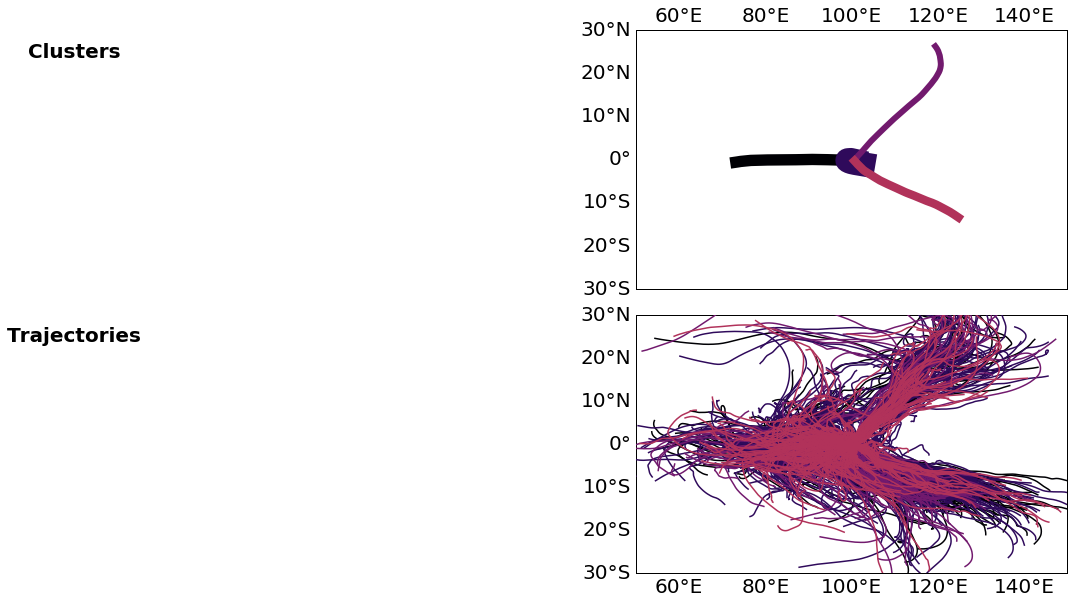

In [17]:
colors = np.linspace(0, 0.95, 7)

mapcorners =  [50, -30, 150, 30]
standard_pm = None
mapdesign0 = pysplit.MapDesign(mapcorners, standard_pm)
mapdesign1 = pysplit.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,10))
map0 = mapdesign0.make_basemap(ax=ax0)
map1 = mapdesign1.make_basemap(ax=ax1)

# Text on maps
x, y = map0(-80, 25)
font_params = {'horizontalalignment' : 'center',
               'verticalalignment' : 'center',
               'fontsize' : 20,
               'weight' : 'bold'}

ax0.text(x, y, 'Clusters', **font_params)
ax1.text(x, y, 'Trajectories', **font_params)

for clus, color in zip(clusgroup, colors):
    params = {'zorder' : 24,
    		  'latlon' : True,
    		  'c' : plt.cm.inferno(color)}

    map0.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*50,
    		  **params)

    for traj in clus:
        map1.plot(*traj.path.xy, lw=1.5, **params)
        
fig.subplots_adjust(hspace=0.1)
plt.show()

In [22]:
print(clusgroup)